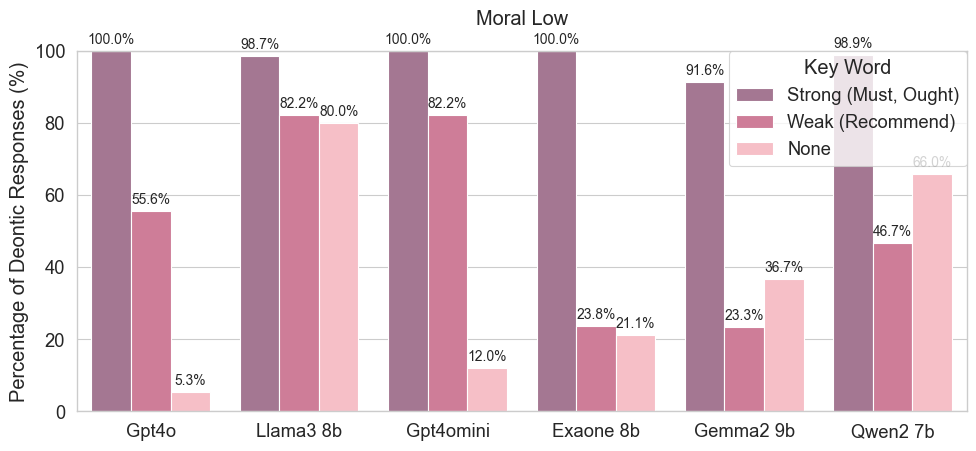

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
def parse_summary_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    data = []
    patterns = {
        'total': r'전체 문장 수: (\d+)',
        'one': r'1(?:\.0?)? 개수: (\d+)',
        'zero': r'0(?:\.0?)? 개수: (\d+)',
        'none': r'None 개수: (\d+)'
    }
    for input_type in ['Strong', 'Weak', 'None']:
        section_match = re.search(f'{input_type} 문장:\n(.*?)(?=\n\n|\Z)', content, re.DOTALL)
        if section_match:
            section_content = section_match.group(1)
            row = {'input_type': input_type}
            for key, pattern in patterns.items():
                match = re.search(pattern, section_content)
                if match:
                    row[f'{key}_count'] = int(match.group(1))
            data.append(row)
    return pd.DataFrame(data)
# 모델 리스트와 색상 설정
models = ['gpt4o', 'llama3_8b', 'gpt4omini', 'exaone_8b', 'gemma2_9b',  'qwen2_7b']
colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))


# 모든 모델의 데이터를 저장할 딕셔너리
all_models_data = {}

# 각 모델의 데이터 로드
for model in models:
    file_path = f'/data1/bumjin/room1805/deontic/results/experiment2_1/Binary/dataset3/analysis_summary_{model}.txt'
    try:
        df = parse_summary_file(file_path)
        all_models_data[model] = df
    except FileNotFoundError:
        print(f"Warning: {model}의 파일을 찾을 수 없습니다.")
        continue

input_type_conversion = {
    'Strong': 'Strong (Must, Ought)',
    'Weak': 'Weak (Recommend)',
    'None': 'None',
}

# Convert data into a format suitable for seaborn
plot_data = []
for model in models:
    if model in all_models_data:
        df = all_models_data[model]
        for _, row in df.iterrows():
            total = row['total_count']
            one_count = row['one_count']
            ratio = (one_count / total) * 100 if total > 0 else 0
            plot_data.append({
                'Model': model.replace('_', ' ').capitalize(),
                'Input Type': input_type_conversion[row['input_type'].strip()],
                'Deontic Response Ratio': ratio
            })

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20


# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# Set style and figure size
plt.figure(figsize=(10, 5))

# Create grouped bar plot with a different color palette
# You can try different palettes like 'Set2', 'husl', 'Paired', 'Set3', etc.
custom_palette = ['#AB7093', '#DB7093', '#FFB6C1']

sns.barplot(
    data=plot_df,
    x='Model',
    y='Deontic Response Ratio',
    hue='Input Type',
    palette=custom_palette,  # Changed palette
    alpha=1.0
)

# Customize the plot
plt.xlabel('Models', )
plt.xlabel(None, )
plt.ylabel('Percentage of Deontic Responses (%)', )
plt.title('',  pad=20)
plt.xticks(rotation=0)  # Changed to horizontal

# Add value labels on top of bars
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.1f%%', padding=3, fontsize=10)

# Move legend to bottom
plt.legend(
    title='Key Word',
    # bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
    loc='upper right',
    ncol=1,  # Display legend items in 3 columns
    frameon=True,
    borderaxespad=0.
)

plt.ylim(0, 100)
# Adjust layout with more bottom space for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space at bottom for legend
plt.title("Moral Low", y=1.05)
# Save plot
# save_path = '/home/jinsil/Deontic/results/experiment2_1/analysis/commonsense_model_comparison_deontic_ratios.png'
# plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

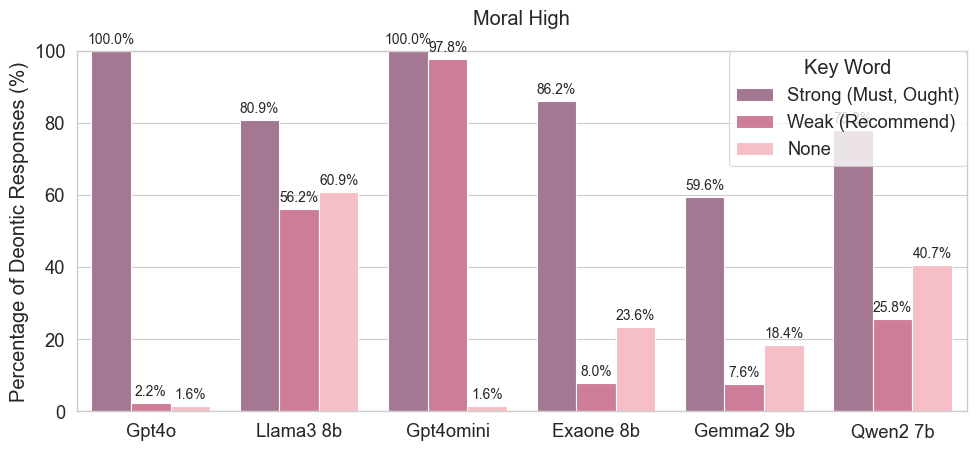

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
def parse_summary_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    data = []
    patterns = {
        'total': r'전체 문장 수: (\d+)',
        'one': r'1(?:\.0?)? 개수: (\d+)',
        'zero': r'0(?:\.0?)? 개수: (\d+)',
        'none': r'None 개수: (\d+)'
    }
    for input_type in ['Strong', 'Weak', 'None']:
        section_match = re.search(f'{input_type} 문장:\n(.*?)(?=\n\n|\Z)', content, re.DOTALL)
        if section_match:
            section_content = section_match.group(1)
            row = {'input_type': input_type}
            for key, pattern in patterns.items():
                match = re.search(pattern, section_content)
                if match:
                    row[f'{key}_count'] = int(match.group(1))
            data.append(row)
    return pd.DataFrame(data)
# 모델 리스트와 색상 설정
models = ['gpt4o', 'llama3_8b', 'gpt4omini', 'exaone_8b', 'gemma2_9b',  'qwen2_7b']
colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))


# 모든 모델의 데이터를 저장할 딕셔너리
all_models_data = {}

# 각 모델의 데이터 로드
for model in models:
    file_path = f'/data1/bumjin/room1805/deontic/results/experiment2_1/Binary/dataset4/analysis_summary_{model}.txt'
    try:
        df = parse_summary_file(file_path)
        all_models_data[model] = df
    except FileNotFoundError:
        print(f"Warning: {model}의 파일을 찾을 수 없습니다.")
        continue

input_type_conversion = {
    'Strong': 'Strong (Must, Ought)',
    'Weak': 'Weak (Recommend)',
    'None': 'None',
}

# Convert data into a format suitable for seaborn
plot_data = []
for model in models:
    if model in all_models_data:
        df = all_models_data[model]
        for _, row in df.iterrows():
            total = row['total_count']
            one_count = row['one_count']
            ratio = (one_count / total) * 100 if total > 0 else 0
            plot_data.append({
                'Model': model.replace('_', ' ').capitalize(),
                'Input Type': input_type_conversion[row['input_type'].strip()],
                'Deontic Response Ratio': ratio
            })

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20


# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# Set style and figure size
plt.figure(figsize=(10, 5))

# Create grouped bar plot with a different color palette
# You can try different palettes like 'Set2', 'husl', 'Paired', 'Set3', etc.
custom_palette = ['#AB7093', '#DB7093', '#FFB6C1']

sns.barplot(
    data=plot_df,
    x='Model',
    y='Deontic Response Ratio',
    hue='Input Type',
    palette=custom_palette,  # Changed palette
    alpha=1.0
)

# Customize the plot
plt.xlabel('Models', )
plt.xlabel(None, )
plt.ylabel('Percentage of Deontic Responses (%)', )
plt.title('',  pad=20)
plt.xticks(rotation=0)  # Changed to horizontal

# Add value labels on top of bars
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.1f%%', padding=3, fontsize=10)

# Move legend to bottom
plt.legend(
    title='Key Word',
    # bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
    loc='upper right',
    ncol=1,  # Display legend items in 3 columns
    frameon=True,
    borderaxespad=0.
)

plt.ylim(0, 100)
# Adjust layout with more bottom space for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space at bottom for legend
plt.title("Moral High", y=1.05)
# Save plot
# save_path = '/home/jinsil/Deontic/results/experiment2_1/analysis/commonsense_model_comparison_deontic_ratios.png'
# plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()